# Titanic survival analysis

In [1]:
!pip install kagglehub

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("brendan45774/test-file")

print("Path to dataset files:", path)

Path to dataset files: /Users/klaudia/.cache/kagglehub/datasets/brendan45774/test-file/versions/6


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score
import itertools
import numpy as np

In [4]:
import os
# Preview the first few rows to understand the structure of the data
files = os.listdir(path)
print("Files in dataset:", files)
df = pd.read_csv(f"{path}/tested.csv") 
df.head(10)

Files in dataset: ['tested.csv']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
# Display basic information about the dataset (columns, types, non-null counts)
print(f"Dataset shape: {df.shape}")  
print(f"Columns: {list(df.columns)}")  
df.info()

Dataset shape: (418, 12)
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
#Identify columns with missing values to guide data cleaning
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
#Exclude 'Cabin' column from the dataset to avoid bias caused by a high proportion of missing data
df.drop('Cabin', axis=1, inplace=True)

In [8]:
print(df)

     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...

In [9]:
#Filling missing values in 'Age' column with median
df['Age'] = df['Age'].fillna(df['Age'].median())

In [10]:
#Filling missing values in 'Fare' column with mean
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [11]:
# Check for missing values 
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
# Map categorical 'Sex' values to numerical format (female -> 0, male -> 1)
df["Sex"] = df["Sex"].map({"female": 0, "male": 1})

In [13]:
print(df)

     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name  Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    1  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)    0  47.0      1      0   
2                       Myles, Mr. Thomas Francis    1  62.0      0      0   
3                                Wirz, Mr. Albert    1  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0  22.0      1      1   
..                                            ...  ...   ...    ...    ... 

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.023245 -0.026751  0.023245 -0.031447  0.003818   
Survived       -0.023245  1.000000 -0.108615 -1.000000  0.008035  0.099943   
Pclass         -0.026751 -0.108615  1.000000  0.108615 -0.467853  0.001087   
Sex             0.023245 -1.000000  0.108615  1.000000 -0.008035 -0.099943   
Age            -0.031447  0.008035 -0.467853 -0.008035  1.000000 -0.071197   
SibSp           0.003818  0.099943  0.001087 -0.099943 -0.071197  1.000000   
Parch           0.043080  0.159120  0.018721 -0.159120 -0.043731  0.306895   
Fare            0.008209  0.191382 -0.576619 -0.191382  0.344627  0.171488   

                Parch      Fare  
PassengerId  0.043080  0.008209  
Survived     0.159120  0.191382  
Pclass       0.018721 -0.576619  
Sex         -0.159120 -0.191382  
Age         -0.043731  0.344627  
SibSp        0.306895  0.171488  
Parch        1.000000  0.230001  
Fare         0.230001  1.

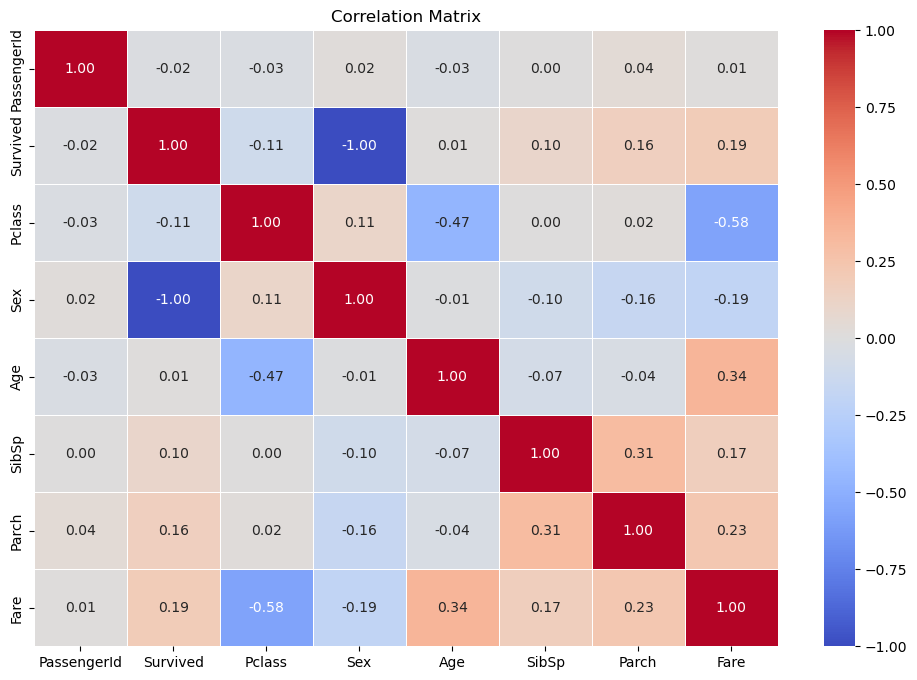

In [14]:
#Plot correlations between numerical features to detect multicollinearity
corr = df.corr(numeric_only=True)
print(corr)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [15]:
print(df.corr(numeric_only=True)["Survived"].sort_values(ascending=False))


Survived       1.000000
Fare           0.191382
Parch          0.159120
SibSp          0.099943
Age            0.008035
PassengerId   -0.023245
Pclass        -0.108615
Sex           -1.000000
Name: Survived, dtype: float64


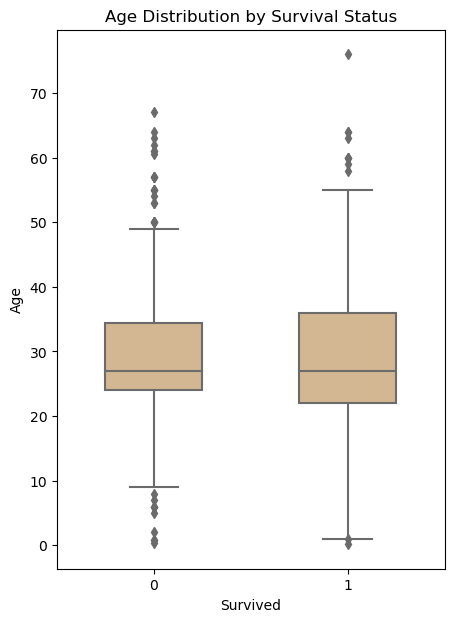

Quartiles of Age by Survival status:

           25%   50%     75%
Survived                    
0         24.0  27.0  34.375
1         22.0  27.0  36.000


In [16]:
#Box plot showing Age distribution by Survival status
plt.figure(figsize=(5,7))
sns.boxplot(
    data=df,
    x="Survived",
    y="Age",
    color="burlywood",
    width=0.5)
plt.xlabel("Survived")
plt.title("Age Distribution by Survival Status")
plt.show()

print("Quartiles of Age by Survival status:\n")
print(df.groupby("Survived")["Age"].describe()[["25%", "50%", "75%"]])

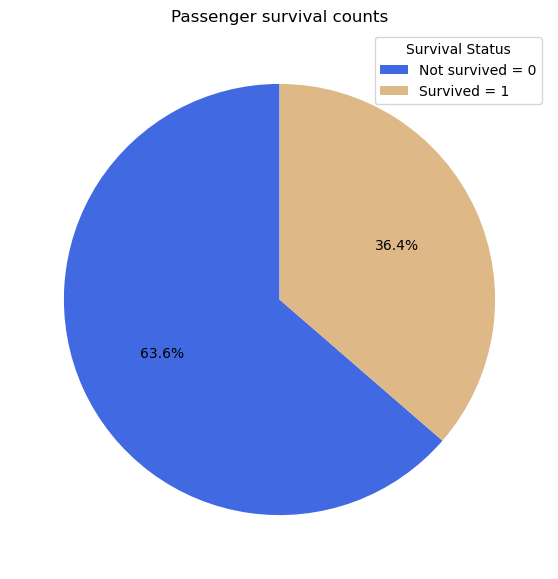

In [17]:
#Visualize target variable distribution to understand class balance
labels = ["Not survived = 0", "Survived = 1"]
counts = df['Survived'].value_counts()
colors = ['royalblue', 'burlywood']

plt.figure(figsize=(7,7))
plt.pie(
    counts,
    colors=colors,
    startangle=90,
    autopct='%1.1f%%'
)
plt.legend(labels, title="Survival Status", loc="upper right")

plt.title("Passenger survival counts")
plt.show()

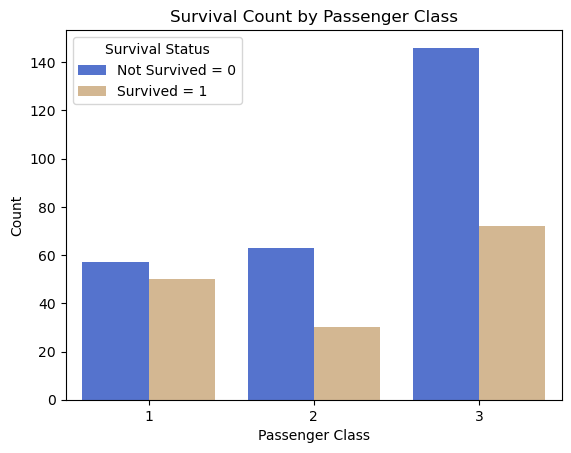

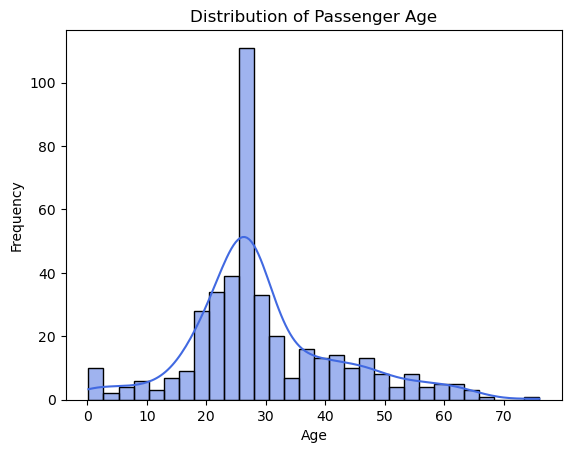

In [18]:
#Relationship between passenger class (Pclass) and Survival to identify how survival rates vary across different classes
sns.countplot(data=df, x="Pclass", hue="Survived", palette={1: "burlywood", 0: "royalblue"})
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survival Status",
labels=["Not Survived = 0", "Survived = 1"])
plt.show()

#Visualize Age distribution to assess its range, skewness, and outliers
sns.histplot(df['Age'], bins=30, kde=True, color="royalblue")
plt.title("Distribution of Passenger Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [19]:
print("Available columns:", df.columns.tolist())

Available columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


In [20]:
#Convert categorical variables into dummy variables for inclusion in the logistic regression model
df = pd.get_dummies(df, columns=["Pclass", "Embarked"], drop_first=True)
print(df.columns)

Index(['PassengerId', 'Survived', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [21]:
#Define the target variable Y and the variables X to be used in the model
X = df.drop(columns=["Survived","PassengerId", "Name", "Ticket", "Sex"])
y = df["Survived"]

In [22]:
#Split the dataset into training and test sets and fit a logistic regression model to predict the target variable 'Survived'
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
clf = LogisticRegression(class_weight='balanced',
solver="liblinear",
max_iter=2000,
C=0.5)
clf.fit(train_X, train_y)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=2000,
                   solver='liblinear')

In [23]:
predicted_y = clf.predict(test_X)

In [24]:
#Evaluate the model by computing the confusion matrix to compare predicted vs actual labels
conf = confusion_matrix(test_y, predicted_y)
print("Confusion Matrix:")
print(conf)
print("\nClassification Report:")
print(classification_report(test_y, predicted_y))

Confusion Matrix:
[[41  9]
 [18 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        50
           1       0.64      0.47      0.54        34

    accuracy                           0.68        84
   macro avg       0.67      0.65      0.65        84
weighted avg       0.67      0.68      0.67        84



41 passengers who did not survive were correctly classified as "not survived"
16 passengers who survived were correctly classified as "survived"
18 survivors were incorrectly predicted as non-survivors (False Negatives)
9 non-survivors were incorrectly predicted as survivors (False Positives)

The model is good at identifying passengers who died, with relatively few misses (69% of precision and 82% of recall)
The model struggles to detect survivors and misses more than half of them (64% of precision and 47% of recall)

In [25]:
#Calculate the AUC score using predicted probabilities for the positive class to assess model discrimination
probs = clf.predict_proba(test_X)[:, 1]
auc = roc_auc_score(test_y, probs)
print(f"AUC: {auc:.3f}")

AUC: 0.689


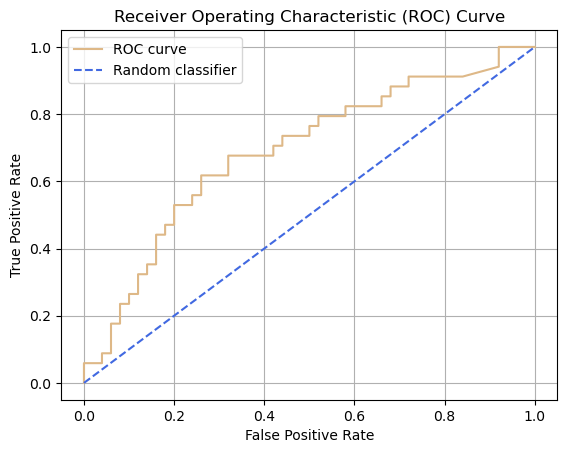

In [26]:
#Plot ROC curve to visualize the relationship between TPR (sensitivity) and FPR (1-specificity)
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='burlywood', label='ROC curve')
    plt.plot([0, 1], [0, 1], color='royalblue', linestyle='--', label='Random classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

fpr, tpr, thresholds = roc_curve(test_y, probs)
plot_roc_curve(fpr, tpr)

In [27]:
#Determine the optimal classification threshold that maximizes the difference between TPR and FPR for better decision-making
fpr, tpr, thresholds_roc = roc_curve(test_y, probs)
j_scores = tpr - fpr
j_best_idx = np.argmax(j_scores)
best_threshold_roc = thresholds_roc[j_best_idx]

print(f"Best_threshold: {best_threshold_roc:.2f} (TPR - FPR = {j_scores[j_best_idx]:.3f})")


Best_threshold: 0.47 (TPR - FPR = 0.358)


In [28]:
#Apply the optimal threshold to generate final predictions and evaluate performance using the confusion matrix

final_preds = (probs >= best_threshold_roc).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(test_y, final_preds))
print("\nClassification Report:")
print(classification_report(test_y, final_preds))


Confusion Matrix:
[[37 13]
 [13 21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        50
           1       0.62      0.62      0.62        34

    accuracy                           0.69        84
   macro avg       0.68      0.68      0.68        84
weighted avg       0.69      0.69      0.69        84



Previous TN = 41 → now 37 (slightly fewer non-survivors correctly predicted)

Previous FP = 9 → now 13 (more non-survivors misclassified as survivors)

Previous FN = 18 → now 13 (fewer survivors missed)

Previous TP = 16 → now 21 (more survivors correctly predicted)

Slight drop in recall for non-survivors (more FN), but higher precision (74% of precision and 74% of recall)
Much better at detecting survivors, more True Positives and fewer False Negatives (62% of precision and 62% of recall)